In [17]:
import numpy as np
import mne
from glob import glob
import yaml
from pprint import pprint

# Load config
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

# List the files
files = sorted(glob(f'../{config["DIRECTORY_OUT"]}/*.npy'))
files

['../RawSessions/raw/minecraft_2023-10-27_23-00-44.npy']

In [18]:
session_data = np.load(files[0], allow_pickle=True)
# create mne info object
info = mne.create_info(ch_names=config['CHANNELS_NAMES'], sfreq=config['SAMPLE_RATE'], ch_types='eeg')

In [37]:
selected_sentence = 0

print(f'Number of recorded sentences: {len(session_data)}')
pprint(f'Keys in single sentence dict: {session_data[selected_sentence].keys()}')
print(f'Shape of EEG data: {session_data[selected_sentence]["EEG1"].shape}')
# <stateVectors> , <dominantFreqs> & <patchDurations> are placeholders for later use
print(f'Duration of first sentence in session in seconds: {session_data[selected_sentence]["sentenceDuration"]} s')
print(f'Original sentence: {session_data[selected_sentence]["sentenceOrginal"]}')
print(f'Postprocess sentence: {session_data[selected_sentence]["sentencePost"]}')
print(f'Sentences -> words: {session_data[selected_sentence]["Tokens"]}')
print(f'Tokenized sentence: {session_data[selected_sentence]["tokenIds"]}')
print(f'Word timings (word, (id, start, end)): {(session_data[selected_sentence]["wordTimings"])}')

Number of recorded sentences: 11
("Keys in single sentence dict: dict_keys(['EEG1', 'stateVectors', "
 "'dominantFreqs', 'patchDurations', 'sentenceDuration', 'sentenceOrginal', "
 "'sentencePost', 'Tokens', 'tokenIds', 'wordTimings', 'WPM'])")
Shape of EEG data: (31, 1017)
Duration of first sentence in session in seconds: 1.986328125 s
Original sentence: Walk backward.
Postprocess sentence: walk backward
Sentences -> words: ['walk', 'backward']
Tokenized sentence: [3328, 8848]
Word timings (word, (id, start, end)): [('Walk', (0, 0.0, 0.6066632002762923)), ('backward.', (1, 0.6213361936945512, 1.986328125))]


Creating RawArray with float64 data, n_channels=31, n_times=1017
    Range : 0 ... 1016 =      0.000 ...     1.984 secs
Ready.


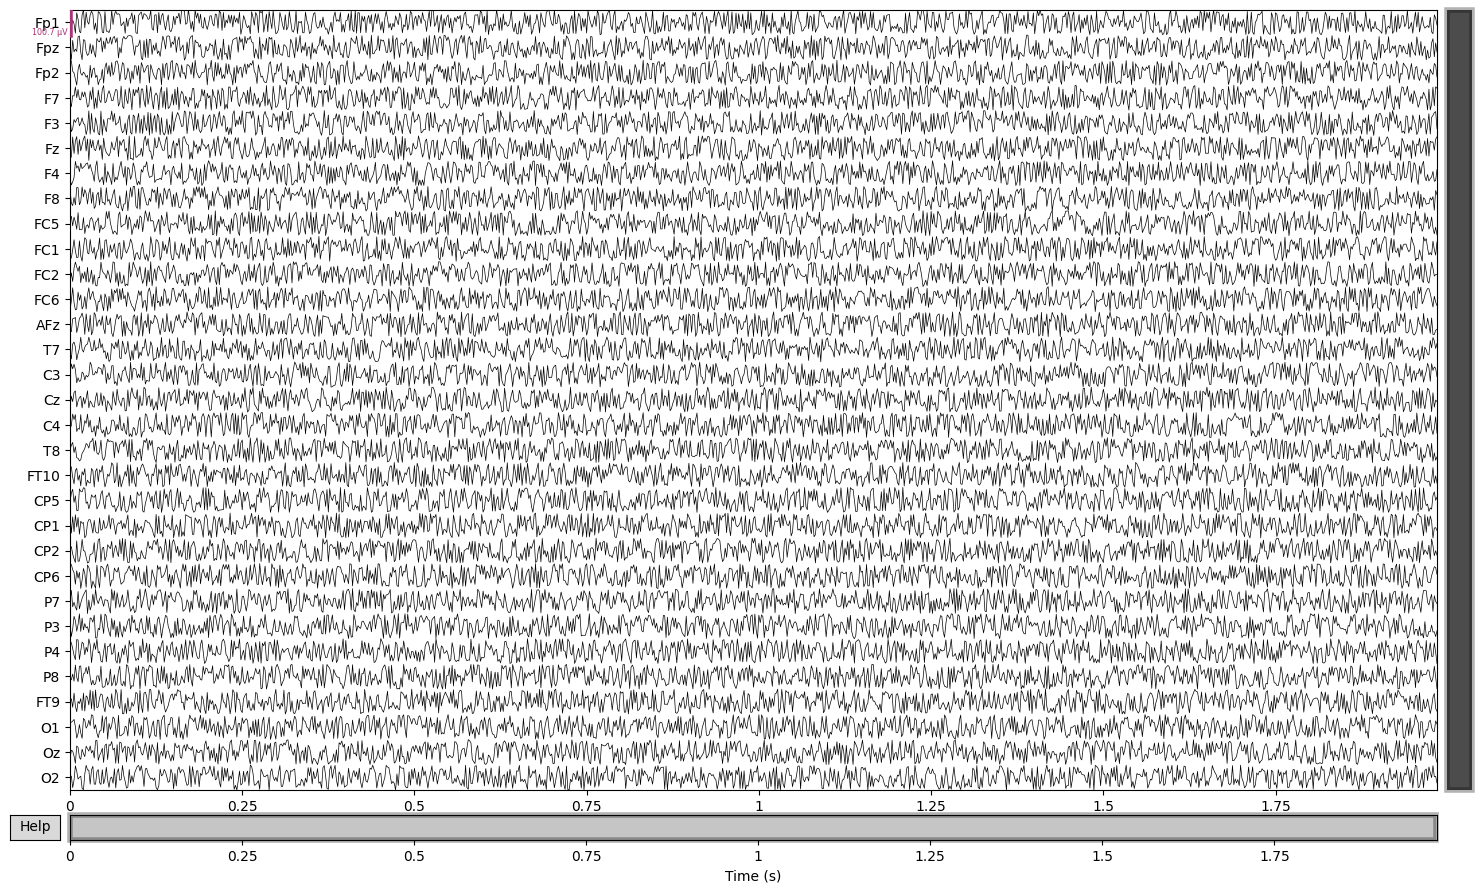

/var/folders/cd/6lrk2wsd51bfnz1bq8mlk4zr0000gn/T/ipykernel_16800/332267680.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw.plot(n_channels=32, scalings='auto', title='Auto-scaled Data from arrays').show()


In [40]:
raw = mne.io.RawArray(session_data.take(0)['EEG1'], info)
raw.set_montage(mne.channels.make_standard_montage('standard_1020'))
raw.plot(n_channels=32, scalings='auto', title='Auto-scaled Data from arrays').show()
